# 基于JoinQuant平台的双均线策略
本系列是基于JoinQuant平台进行一系列量化策略的学习。本文展示的是在JoinQuant平台上编写的代码，以及得到的回测结果。

本文将讨论双均线策略，对601318股票在2021-01-01到2023-01-01期间回测，并附上回测后的收益情况。

附上操作界面截图，本系列的后续策略中将不再展示。

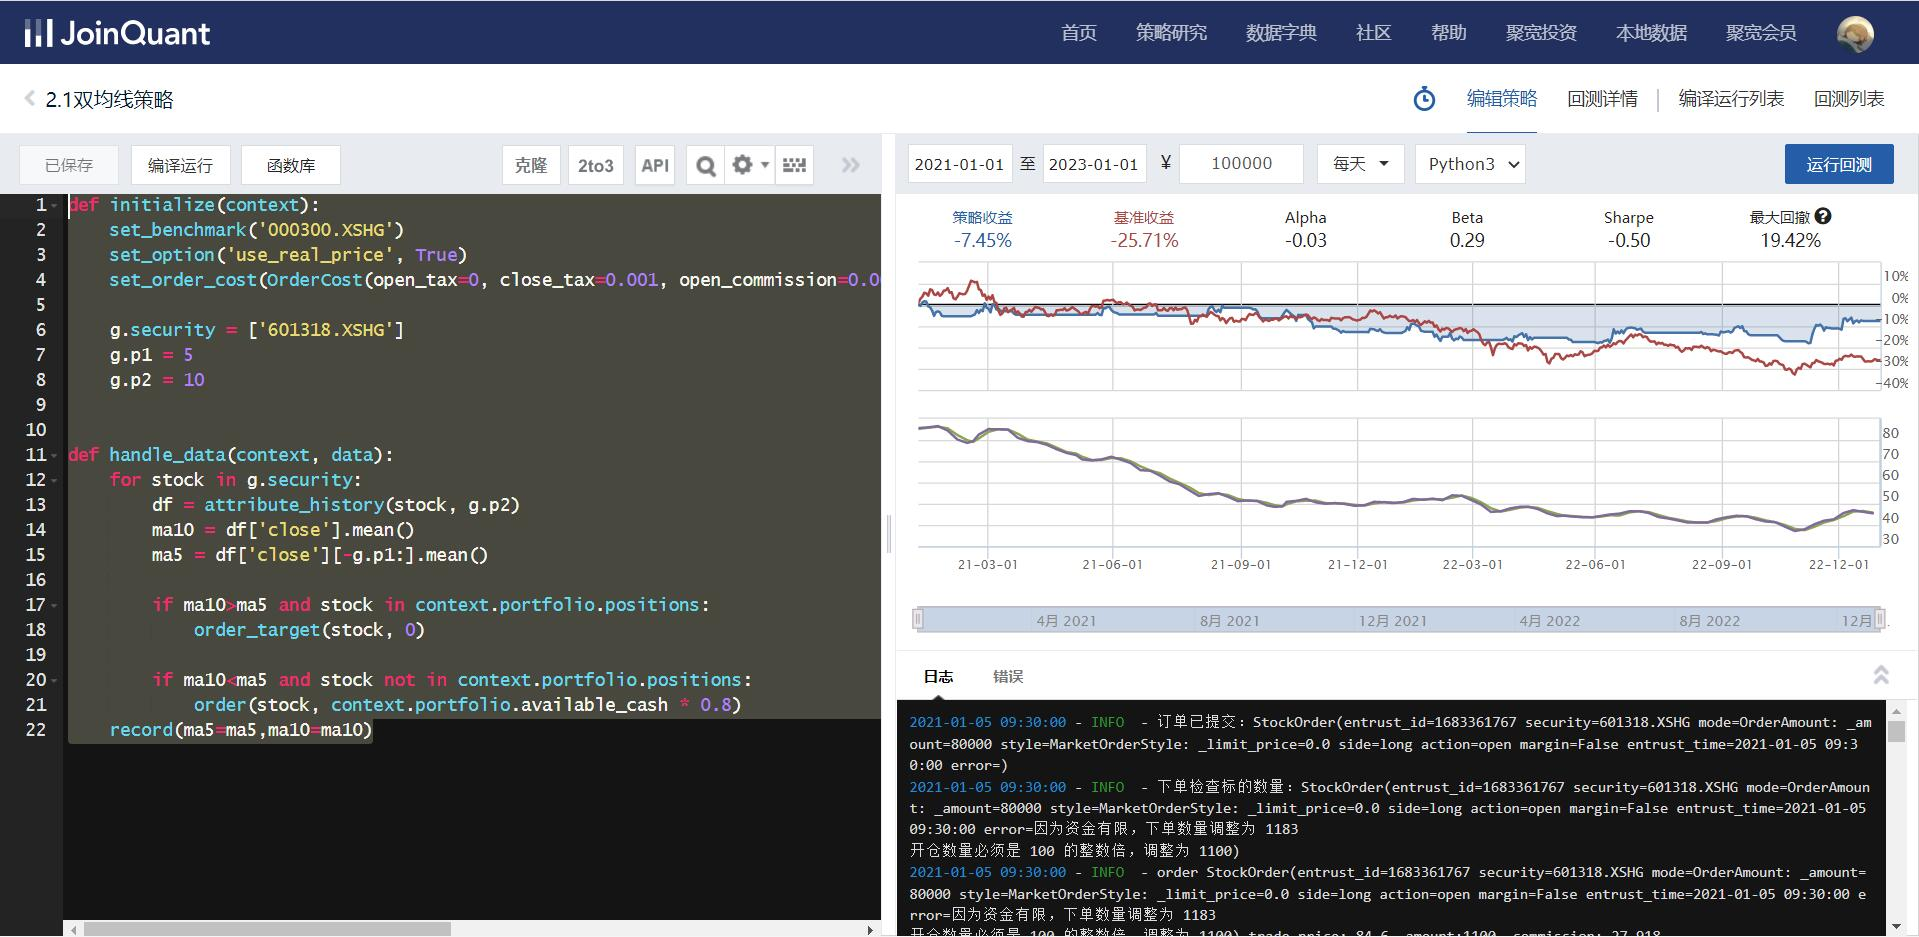

In [ ]:
def initialize(context):
    set_benchmark('000300.XSHG')
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, open_commission=0.0003,\
                             close_commission=0.0003, close_today_commission=0, min_commission=5),type='stock')
    
    g.security = ['601318.XSHG']
    g.p1 = 5
    g.p2 = 10
    
    
def handle_data(context, data):
    for stock in g.security:
        df = attribute_history(stock, g.p2)
        ma10 = df['close'].mean()
        ma5 = df['close'][-g.p1:].mean()
        
        if ma10>ma5 and stock in context.portfolio.positions:
            order_target(stock, 0)
        
        if ma10<ma5 and stock not in context.portfolio.positions:
            order(stock, context.portfolio.available_cash * 0.8)
    record(ma5=ma5,ma10=ma10)

In [16]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/result/2.1.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%),ma10,ma5
0,2021-01-04 16:00:00,1.08,0.00,0.0,0.00,0,0,-1.07,85.422,85.236
1,2021-01-05 16:00:00,3.02,-0.39,0.0,-390.92,93060,0,-3.31,85.161,85.632
2,2021-01-06 16:00:00,3.96,1.23,1617.0,0.00,0,0,-2.63,84.883,85.562
3,2021-01-07 16:00:00,5.80,1.80,572.0,0.00,0,0,-3.78,85.042,85.610
4,2021-01-08 16:00:00,5.45,1.62,0.0,-176.00,0,0,-3.63,85.183,85.686


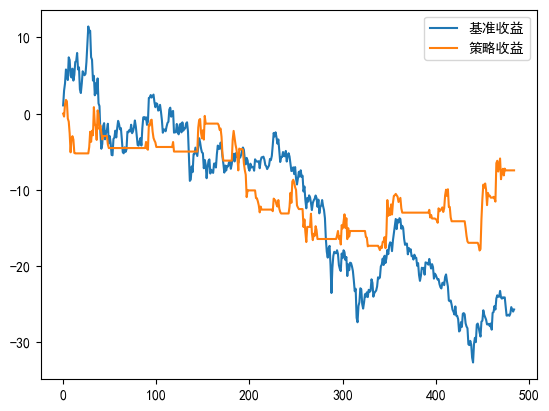

In [17]:
data[['基准收益', '策略收益']].plot()
plt.show()

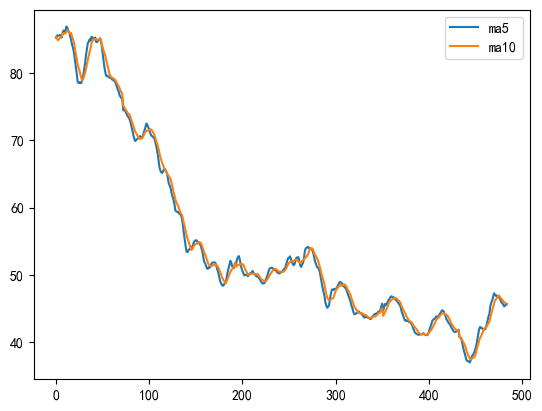

In [18]:
data[['ma5', 'ma10']].plot()
plt.show()